# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

In [ ]:
# %타입, %s: 문자열, %d: 정수, %f: 실수, %%: %
'%s: %.2f' % ('키', 167.2)

In [ ]:
import matplotlib.pyplot as plt
label = ['사과', '베', '복숭아', '귤']
amount = [20, 10, 50, 20]

plt.pie(amount,
        labels=label,
        autopct='%.2f%%',
        textprops={'fontsize':10},
        explode = [0.1, 0, 0, 0],  # : '파이조각'들을 지정한 크기만큼 뽑아준다
        shadow=True
       )

plt.show()

## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [ ]:
# !pip install xlrd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns = 25

In [ ]:
df = pd.read_excel('data/webbrowser_share.xls', 
                   index_col='date',
                   converters={'date':str},  # 특정 컬럼을 어떤 타입으로 읽을지 설정 (생략: 알아서 타입을 변환)
                  )
df.shape

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# 점유율이 미미한 브라우져들은 묶어서 기타로 만들어 줌
cols = df.columns
web_df = df[cols[:6]].copy()
web_df.head()

In [ ]:
web_df['etc'] = df[cols[6:]].sum(axis=1)

In [ ]:
web_df

In [ ]:
# 2018.08 점유율
plt.figure(figsize=(10, 10))
plt.pie(web_df.loc['2018.08'], 
        labels=web_df.columns,
        autopct = '%0.2f%%',
        textprops={'fontsize':10},
        pctdistance=0.85,  # 퍼센트 text의 위치. 중심점: 0, 경계선: 1
        labeldistance=1.05 # 라벨 text의 위치. 중심점: 0, 경계선: 1
       )

plt.show()

In [ ]:
web_df.loc['2018.08']

In [ ]:
# label을 legendfh cjfl
plt.figure(figsize=(7, 7))
# wedge: 파이조각객체들,
# texts: 라벨과 그 위치 -> text객체
# autotext: 퍼센트 문자열들과 위치 -> Text객체

wedge, tests, autotexts = plt.pie(web_df.loc['2018.08'], 
                                  autopct = '%0.2f%%',
                                  textprops={'fontsize':10},
                                 )
plt.legend(wedge, web_df.columns,
           bbox_to_anchor=(1, 0.9), loc='upper left',
           title='웹 브라우저', fontsize=10) # 
plt.show()

# 5 히스토그램(Histogram) 그리기
## 5.1 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [ ]:
import pandas as pd
dia = pd.read_csv('data/diamonds.csv')
dia.info()

In [ ]:
dia.price.value_counts().plot(kind='bar')

In [ ]:
price_cate = pd.cut(dia['price'], bins=[300, 5000, 10000, 20000], labels=['저가', '중가', '고가'])
price_cate

In [ ]:
cnt = price_cate.value_counts()  # 도수분포표(연속형 -> 범주형 -> count)
cnt

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(cnt.index, cnt)  # 도수분포표의 시각화 -> 히스토그램
plt.show()

In [ ]:
# 히스토그램
# plt.hist(dia['price'], bins=3)  
plt.hist(dia['price'], bins=[300, 5000, 10000, 20000])
# 히스토그램을 그릴 데이터셋: 연속형값 => 범위를 기준으로 10분할(등분-default) -> 개수 count
plt.show()

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

In [ ]:
tips = pd.read_csv('data/tips.csv')
tips.shape

In [ ]:
tips.head()

In [ ]:
tips['sex'].value_counts()
tips['smoker'].value_counts()
tips['day'].value_counts()
tips['size'].value_counts()

In [ ]:
tips['total_bill'].value_counts()
tips['tip'].value_counts()

### total_bill 의 분포를 시각화

In [ ]:
plt.hist(tips['total_bill'],
         # bins = 300,
         bins=[0.5, 10, 13, 14, 20, 25, 30,40,502], # 원하는 범위로 나누기
         alpha=5.6
        )
# tip의 분포
plt.hisst(tips['tip'])
plt.show()

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quatile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

In [57]:
import numpy as np

In [58]:
data = np.random.randint(1, 100, 10000)  #랜덤값 생성성컬렴명 1~100개 사이 정수
data[:5] = [200, 250, -50, -100, -40]

In [60]:
# 사분위수
pd.Series(data).quantile(q=[0.25, 0.5, 0.75])

0.25    25.0
0.50    50.0
0.75    76.0
dtype: float64

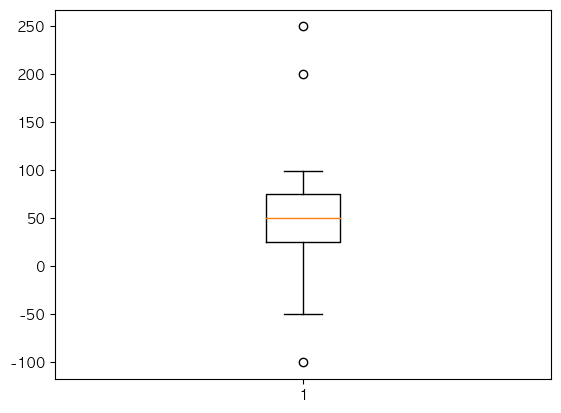

In [61]:
plt.boxplot(data)
plt.show()

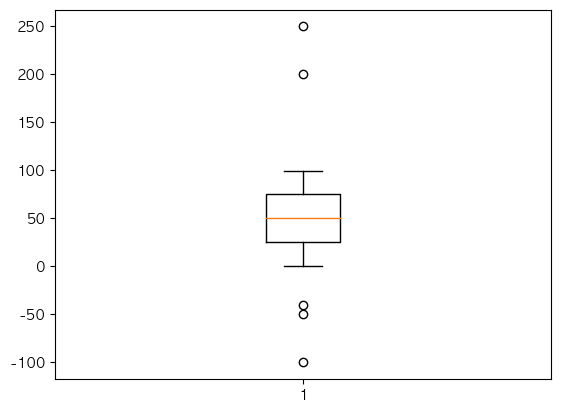

In [62]:
# 정상범위를 더 좁게
## ?????????? 왜 나는 최소값 최대값 겹치는 곳에 o 없징??
plt.boxplot(data, whis=0.5)
plt.show()

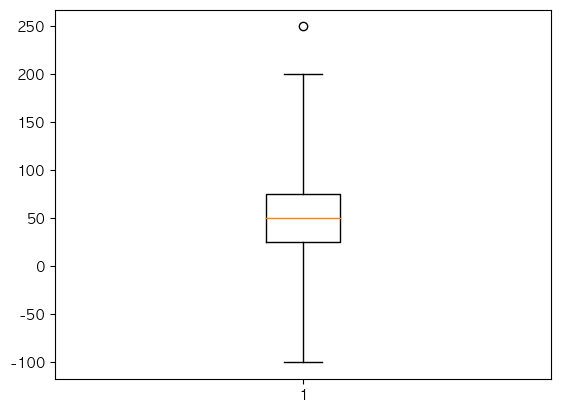

In [63]:
# 정상범위를 더 넓게
plt.boxplot(data, whis=3)
plt.show()

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

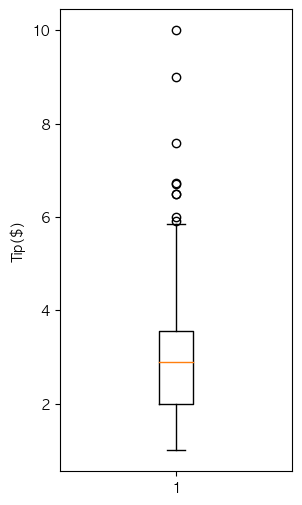

In [64]:
# tip의 분포 -> boxplot (값의 범위를 기준 시각화)
plt.figure(figsize=(3, 6))
plt.boxplot(tips['tip'])
plt.ylabel('Tip($)')
plt.show()

- 남녀별 tip의 분포를 하나의 boxplot에서 그려 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.

In [65]:
# 남녀별 tip을 분리
m_tip = tips.loc[tips['sex']=='Male', 'tip']
m_tip

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

In [69]:
f_tip = tips.query('sex=="Female"')['tip']

In [70]:
f_tip

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

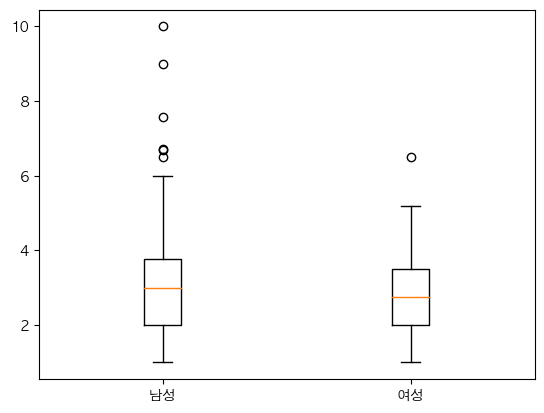

In [72]:
plt.boxplot([m_tip, f_tip], labels=['남성', '여성'])
plt.show()